In [ ]:
class MultiplyGate(object):
  def forward(x, y):
    z = x*y
    self.x = x # must keep these around
    self.y = y
    return z

  def backward(dz):
    dx = self.y*dz # [dz/dx * dL/dz]
    dy = self.x*dz # [dz/dy * dL/dz]
    return [dx, dy]

In [ ]:
import numpy as np
from numpy.random import randn

N, D_in, H, D_out = 64, 1000, 100, 10
x, y = randn(N, D_in), randn(N, D_out)
w1, w2 = randn(D_in, H), randn(H, D_out)

for t in range(2000): # refer to note graph
  h = 1/(1+np.exp(-x.dot(w1)))
  y_pred = h.dot(w2)
  loss = np.square(y_pred - y).sum()
  print(t, loss)

  grad_y_pred = 2.0*(y_pred - y)
  grad_w2 = h.T.dot(grad_y_pred)
  grad_h = grad_y_pred.dot(w2.T)
  grad_w1 = x.T.dot(grad_h * h* (1-h))

  w1 -= 1e-4 * grad_w1
  w2 -= 1e-4 * grad_w2

In [ ]:
import numpy as np
from numpy.random import randn

N, D_in, H, D_out = 64, 1000, 100, 10
x, y = randn(N, D_in), randn(N, D_out)
w1, w2 = randn(D_in, H), randn(H, D_out)
print(x.shape)
print(y.shape)
print(w1.shape)
print(w2.shape)

(64, 1000)
(64, 10)
(1000, 100)
(100, 10)


In [ ]:
h = 1/(1+np.exp(-x.dot(w1)))
y_pred = h.dot(w2)
y_pred.shape

(64, 10)

In [ ]:
h.shape

(64, 100)

In [ ]:
x.dot(w1).shape

(64, 100)

In [ ]:
x.shape

(64, 1000)

In [ ]:
x.dot(w1)

array([[-17.92021196, -29.70458259,  26.25990475, ...,  -0.72904458,
        -24.77363973,   0.84629726],
       [  0.66491271,  -6.83506253,   8.45975735, ..., -38.83621762,
         13.85476572,  -3.74188666],
       [ 11.75300054, -84.08530665,  11.85520446, ...,  -5.0654592 ,
        -25.5289028 , -41.20900704],
       ...,
       [-18.46739373,  21.28926383,  -9.65893989, ..., -29.45525142,
         41.83230425,   4.62230192],
       [ -6.12989165,   5.51561255, -45.9204669 , ...,  -1.45457044,
         60.27198217,  -0.57516428],
       [ -9.69425051, -23.25258936,  33.16351167, ...,  64.5614734 ,
         18.28466135,  -0.93276376]])

Img Clf with KNN

In [ ]:
 from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [ ]:
from keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [ ]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
x_train_rows = x_train.reshape(x_train.shape[0], 32 * 32 * 3) # Xtr_rows becomes 50000 x 3072
x_test_rows = x_test.reshape(x_test.shape[0], 32 * 32 * 3) # Xte_rows becomes 10000 x 3072

print(x_train_rows.shape)
print(x_test_rows.shape)

(50000, 3072)
(10000, 3072)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors  = 7)
model.fit(x_train_rows,y_train.ravel())

y_predict = model.predict(x_test_rows[:1000])

print( 'accuracy: %f' % ( np.mean(y_predict == y_test) ))

accuracy: 0.100000


In [ ]:
import numpy as np

class NearestNeighbor(object):
  def __init__(self):
    pass

  def train(self, X, y):
    """ X is N x D where each row is an example. Y is 1-dimension of size N """
    # the nearest neighbor classifier simply remembers all the training data
    self.Xtr = X
    self.ytr = y

  def predict(self, X):
    """ X is N x D where each row is an example we wish to predict label for """
    num_test = X.shape[0]
    # lets make sure that the output type matches the input type
    Ypred = np.zeros(num_test, dtype = self.ytr.dtype)

    # loop over all test rows
    for i in range(num_test):
      # find the nearest training image to the i'th test image
      # using the L1 distance (sum of absolute value differences)
      distances = np.sum(np.abs(self.Xtr - X[i,:]), axis = 1)
      min_index = np.argmin(distances) # get the index with smallest distance
      Ypred[i] = self.ytr[min_index] # predict the label of the nearest example

    return Ypred

In [ ]:
nn = NearestNeighbor() # create a Nearest Neighbor classifier class
nn.train(x_train_rows, y_train) # train the classifier on the training images and labels
Yte_predict = nn.predict(x_test_rows[:10]) # predict labels on the test images
# and now print the classification accuracy, which is the average number
# of examples that are correctly predicted (i.e. label matches)
print('accuracy: %f' % ( np.mean(Yte_predict == y_test) ))

TypeError: ignored

In [ ]:
from sklearn.datasets import load_breast_cancer
breast_cancer_data = load_breast_cancer()

In [ ]:
import pandas as pd
df_data = pd.DataFrame(breast_cancer_data.data)
df_labels = pd.DataFrame(breast_cancer_data.target)

In [ ]:
df_data

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()

df_data = min_max_scaler.fit_transform(df_data)

In [ ]:
from sklearn.model_selection import train_test_split
training_data, validation_data , training_labels, validation_labels = train_test_split(df_data, df_labels, test_size = 0.2, random_state = 100)

In [ ]:
classifier = KNeighborsClassifier(n_neighbors = 3)
classifier.fit(training_data, training_labels)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=3)

In [ ]:
print(classifier.score(validation_data, validation_labels))

0.9649122807017544


Img Clf with CNN

In [ ]:
import numpy as np
import os
import theano
import keras

from keras.datasets import cifar10
from keras.models  import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.regularizers import l2
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 20, 20

In [ ]:
from keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 3s 0us/step


In [ ]:
print ("Training data:")
print ("Number of examples: ", X_train.shape[0])
print ("Number of channels:",X_train.shape[3]) 
print ("Image size:", X_train.shape[1], X_train.shape[2])
print
print ("Test data:")
print ("Number of examples:", X_test.shape[0])
print ("Number of channels:", X_test.shape[3])
print ("Image size:", X_test.shape[1], X_test.shape[2]) 

Training data:
Number of examples:  50000
Number of channels: 3
Image size: 32 32
Test data:
Number of examples: 10000
Number of channels: 3
Image size: 32 32


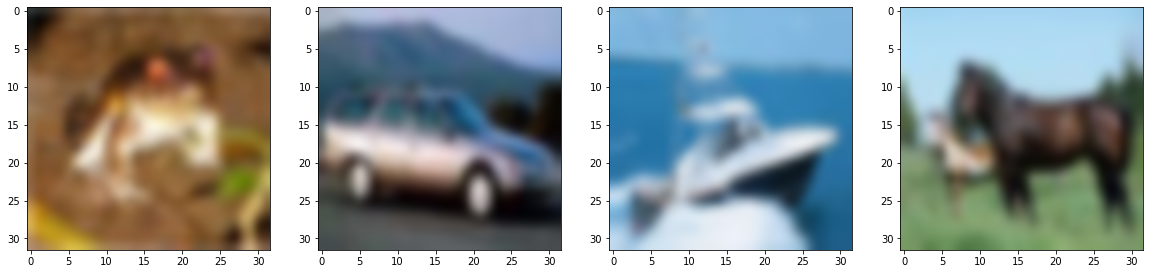

In [ ]:
plt.subplot(141)
plt.imshow(X_train[0], interpolation="bicubic")
plt.grid(False)
plt.subplot(142)
plt.imshow(X_train[4], interpolation="bicubic")
plt.grid(False)
plt.subplot(143)
plt.imshow(X_train[8], interpolation="bicubic")
plt.grid(False)
plt.subplot(144)
plt.imshow(X_train[12], interpolation="bicubic")
plt.grid(False)
plt.show()

For 4-D data Normalization

In [ ]:
mean=[0,0,0] # means for each channel
std=[0,0,0] # std for each channel

newX_train = np.ones(X_train.shape)
newX_test = np.ones(X_test.shape)

for i in range(3):
    mean[i] = np.mean(X_train[:,:,:,i]) # mean in channel i
    std[i] = np.std(X_train[:,:,:,i]) # std in channel i
    
for i in range(3): # normalization
    newX_train[:,:,:,i] = X_train[:,:,:,i] - mean[i]
    newX_train[:,:,:,i] = newX_train[:,:,:,i] / std[i]
    newX_test[:,:,:,i] = X_test[:,:,:,i] - mean[i]
    newX_test[:,:,:,i] = newX_test[:,:,:,i] / std[i]
        
    
X_train = newX_train
X_test = newX_test

In [ ]:
batchSize = 32                   #-- Training Batch Size
num_classes = 10                  #-- Number of classes in CIFAR-10 dataset
num_epochs = 50                   #-- Number of epochs for training   
learningRate= 0.001               #-- Learning rate for the network
lr_weight_decay = 0.95            #-- Learning weight decay. Reduce the learn rate by 0.95 after epoch


img_rows = 32                     #-- input image dimensions
img_cols = 32 

Y_train = np_utils.to_categorical(y_train, num_classes)
Y_test = np_utils.to_categorical(y_test, num_classes)

In [ ]:
model = Sequential()

# layer 1
model.add(Conv2D(64,(3, 3), input_shape=(img_rows, img_cols,3), padding='same'))
model.add(Dropout(0.1))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Dropout(0.1))
model.add(MaxPooling2D(pool_size=(2,2)))

# layer 2
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Dropout(0.1))
model.add(MaxPooling2D(pool_size=(2,2)))

# layer 3
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(Dropout(0.1))
model.add(MaxPooling2D(pool_size=(2,2)))

# fully connected
model.add(Flatten())
model.add(Dense(512, activation = "relu"))

model.add(Dense(512, activation='relu'))

model.add(Dense(num_classes, activation = "softmax"))

model.summary()

model.compile(optimizer = 'adadelta' , loss = "categorical_crossentropy", metrics=["accuracy"])
model.fit(X_train, Y_train, batch_size=batchSize, 
                      epochs=num_epochs, verbose=1, shuffle=True, validation_data=(X_test, Y_test))

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_36 (Conv2D)          (None, 32, 32, 64)        1792      
                                                                 
 dropout_12 (Dropout)        (None, 32, 32, 64)        0         
                                                                 
 conv2d_37 (Conv2D)          (None, 32, 32, 64)        36928     
                                                                 
 dropout_13 (Dropout)        (None, 32, 32, 64)        0         
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 16, 16, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_38 (Conv2D)          (None, 16, 16, 128)       73856     
                                                      

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

model.save("/content/gdrive/MyDrive/Colab Notebooks/img_clf_cifar10.h5")

In [ ]:
model = keras.models.load_model("/content/gdrive/MyDrive/Colab Notebooks/img_clf_cifar10.h5")
X_new = X_test[:3]
model.predict(X_new)

convolution Layer 구현

In [ ]:
kernel = np.zeors(2,2)
dim = input.shape[0] - kernel.shape[0]+1
kernel_size = kernel.shape[0]
output = np.zeros((dim, dim))

for v in range(dim):
  for h in range(dim):
    k= kernel.dot(input[h:h+kernel_size, v:v+kernel_size]) 
    output[v, h] = k.sum()

output

array([[84., 51., 57., 78.],
       [84., 84., 81., 90.],
       [93., 84., 60., 69.],
       [51., 69., 75., 75.]])

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Conv2D,MaxPooling2D,Flatten #action detectionimport tensorflow
import tensorflow as tf
import matplotlib.pyplot as plt
from IPython.display import HTML

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
IMAGE_SIZE = 128

train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True
)
train_generator = train_datagen.flow_from_directory(
        '/content/gdrive/MyDrive/Cars Dataset/train',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        class_mode="sparse",
)

Found 3160 images belonging to 7 classes.


In [ ]:
count=0
for image_batch, label_batch in train_generator:
#     print(label_batch)
    print(image_batch[0])
    break

[[[0.67246723 0.69940764 0.57809436]
  [0.70338094 0.7452675  0.62009   ]
  [0.76625836 0.7880865  0.6696993 ]
  ...
  [0.96182853 0.9843138  0.99503434]
  [0.9651699  0.9843138  0.99169296]
  [0.9685113  0.9843138  0.9883516 ]]

 [[0.66712105 0.6927249  0.57207984]
  [0.69803476 0.7372482  0.6127389 ]
  [0.7548977  0.78073543 0.66101176]
  ...
  [0.97647065 0.9843138  0.9803922 ]
  [0.97647065 0.9843138  0.9803922 ]
  [0.97647065 0.9843138  0.9803922 ]]

 [[0.6617749  0.68604213 0.5660653 ]
  [0.6926886  0.72922885 0.60538787]
  [0.743537   0.7733844  0.65232414]
  ...
  [0.97647065 0.9843138  0.9803922 ]
  [0.97647065 0.9843138  0.9803922 ]
  [0.97647065 0.9843138  0.9803922 ]]

 ...

 [[0.29068086 0.3102887  0.29460242]
  [0.2913491  0.31095695 0.29527068]
  [0.2920174  0.31162524 0.29593897]
  ...
  [0.5271207  0.53496385 0.49182656]
  [0.59452236 0.5775615  0.51892173]
  [0.6330667  0.6095373  0.5467922 ]]

 [[0.29454505 0.3141529  0.29846662]
  [0.29521334 0.31482118 0.2991349 ]


In [ ]:
class_names = list(train_generator.class_indices.keys())
class_names

['Audi',
 'Hyundai Creta',
 'Mahindra Scorpio',
 'Rolls Royce',
 'Swift',
 'Tata Safari',
 'Toyota Innova']

In [ ]:
test_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)

test_generator = test_datagen.flow_from_directory(
        '/content/gdrive/MyDrive/Cars Dataset/test',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        class_mode="sparse"
)

for image_batch, label_batch in test_generator:
    print(image_batch[0])
    break

Found 813 images belonging to 7 classes.
[[[0.7908319  0.84965545 0.92940116]
  [0.7889655  0.85132027 0.92934066]
  [0.7871266  0.8529576  0.92928016]
  ...
  [0.86274517 0.8980393  0.9333334 ]
  [0.86274517 0.8980393  0.9333334 ]
  [0.86798126 0.8901851  0.9307153 ]]

 [[0.81826097 0.8783881  0.9489872 ]
  [0.81803924 0.87814623 0.94880575]
  [0.8160248  0.879697   0.9486243 ]
  ...
  [0.85733473 0.89262885 0.92792296]
  [0.8573751  0.8926692  0.9279633 ]
  [0.86448455 0.8865877  0.9271582 ]]

 [[0.85357654 0.9111075  0.96863854]
  [0.8526036  0.91195947 0.968699  ]
  [0.8521117  0.9123304  0.9687595 ]
  ...
  [0.8494917  0.88478583 0.92007995]
  [0.849532   0.8848261  0.92012024]
  [0.8539345  0.8813562  0.9201606 ]]

 ...

 [[0.76470596 0.7294118  0.69411767]
  [0.76470596 0.7294118  0.69411767]
  [0.76470596 0.7294118  0.69411767]
  ...
  [0.7502425  0.71494836 0.6796542 ]
  [0.7510935  0.7157994  0.6805053 ]
  [0.75294125 0.7176471  0.68235296]]

 [[0.76470596 0.7294118  0.694117

In [ ]:
train_generator[0][0].shape

(32, 128, 128, 3)

In [ ]:
sz = 128

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape = (sz, sz, 3), activation = "relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(units=96, activation='relu'))
model.add(Dropout(0.40))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=7, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 28800)             0         
                                                                 
 dense (Dense)               (None, 96)                2

In [ ]:
model.compile(optimizer = "adam", loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False), metrics = ['accuracy'])
history = model.fit(train_generator, validation_data = test_generator, epochs = 50)

Epoch 1/50
99/99 [==============================] - 1490s 15s/step - loss: 1.8467 - accuracy: 0.2972 - val_loss: 1.6755 - val_accuracy: 0.3887
Epoch 2/50
99/99 [==============================] - 51s 517ms/step - loss: 1.6604 - accuracy: 0.3880 - val_loss: 1.4360 - val_accuracy: 0.4760
Epoch 3/50
99/99 [==============================] - 51s 516ms/step - loss: 1.4918 - accuracy: 0.4547 - val_loss: 1.3634 - val_accuracy: 0.4982
Epoch 4/50
99/99 [==============================] - 51s 518ms/step - loss: 1.3449 - accuracy: 0.5168 - val_loss: 1.2712 - val_accuracy: 0.5707
Epoch 5/50
99/99 [==============================] - 51s 513ms/step - loss: 1.2434 - accuracy: 0.5611 - val_loss: 1.1824 - val_accuracy: 0.5929
Epoch 6/50
99/99 [==============================] - 51s 511ms/step - loss: 1.1514 - accuracy: 0.5994 - val_loss: 1.1258 - val_accuracy: 0.6187
Epoch 7/50
99/99 [==============================] - 51s 510ms/step - loss: 1.0778 - accuracy: 0.6282 - val_loss: 1.0929 - val_accuracy: 0.6273

In [ ]:
model.save("/content/gdrive/MyDrive/Colab Notebooks/img_clf_car.h5")